#자동차 연비 예측분석 ==> 회귀분석

In [1]:
# numpy, pandas 를 import

# auto-mpg.csv파일을 읽어 data_df에 넣기

In [2]:
#데이터 셋 크기 확인

In [3]:
import numpy as np
import pandas as pd

In [4]:
data_df = pd.read_csv('auto-mpg.csv',header=0)
data_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
#데이터 셋 크기 확인
data_df.shape

(398, 9)

In [6]:
# data_df 에서 위에서 5개 데이터 확인
# 'car_name','origin','horsepower'제거

In [7]:
# data_df 에서 위에서 5개 데이터 확인
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
# 데이터 유형확인
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
# 'car_name','origin','horsepower'제거
data_df = data_df.drop(['car_name','origin','horsepower'],axis = 1)
data_df.shape

(398, 6)

In [10]:
# X(mpg 제외한 나머지),Y(mpg)분할
Y = data_df['mpg']
X = data_df.drop(['mpg'],axis = 1)

In [11]:
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [12]:
X

,cylinders,displacement,weight,acceleration,model_year
0,8,307.0,3504,12.0,70
1,8,350.0,3693,11.5,70
2,8,318.0,3436,11.0,70
3,8,304.0,3433,12.0,70
4,8,302.0,3449,10.5,70
...,...,...,...,...,...
393,4,140.0,2790,15.6,82
394,4,97.0,2130,24.6,82
395,4,135.0,2295,11.6,82
396,4,120.0,2625,18.6,82


In [13]:
# 훈련용(train) 데이터(test)와 평가용 데이터 분할하기 (7:3)
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.3,
                                                   random_state=0)
X_train

,cylinders,displacement,weight,acceleration,model_year
230,8,350.0,4165,11.4,77
357,4,119.0,2615,14.8,81
140,8,304.0,4257,15.5,74
22,4,104.0,2375,17.5,70
250,8,318.0,3735,13.2,78
...,...,...,...,...,...
323,4,156.0,2800,14.4,80
192,6,250.0,3353,14.5,76
117,4,68.0,1867,19.5,73
47,6,250.0,3282,15.0,71


In [14]:
from sklearn.linear_model import LinearRegression
# 선형회귀분석모델생성(lr)
lr = LinearRegression()
# 훈련 X_train,Y_train 문제와 답 알려줌
lr.fit(X_train,Y_train)

LinearRegression()

In [15]:
# 선형 회귀 분석 : 평가 데이터에 대한 예측 수행 ==> 예측 결과
Y_predict = lr.predict(X_test)
# 예측수행
Y_predict

array([12.68813886, 24.89235692, 11.77966226, 20.713484  , 17.59974974,
       28.70463932, 31.8246109 , 24.79459783, 13.3797074 , 28.03809202,
       33.95480562, 32.517138  , 21.28643713, 26.32547953, 16.29305741,
       32.16905355, 30.04731897, 29.90617451, 17.78110613, 30.69577551,
       15.33574367, 25.60299563, 25.4723533 , 20.04730443, 30.70244174,
       26.79576507, 32.20306918, 31.95533215, 30.42830733, 18.19432511,
       21.19981862, 29.62938625, 20.86352443, 30.82503708, 24.35511863,
       23.81034331, 21.45816755, 16.77101118, 31.95362794,  8.06590693,
        9.60178767, 13.8699291 , 27.26165312, 29.00102026, 29.52364892,
       22.58571769, 23.20233694, 13.80533693, 23.86039376, 28.12535283,
       31.40954528, 26.70297991, 15.34381889, 25.01897062, 14.71481708,
        9.53883961, 19.64272577, 26.82491432, 31.30917854, 14.99268593,
       20.64360774, 25.57610711, 22.45200894, 19.72033566, 10.7918702 ,
       11.42513414,  9.7023088 , 19.68724093, 24.98227534,  9.68

0 0
0 1
0 2
1 0
1 1


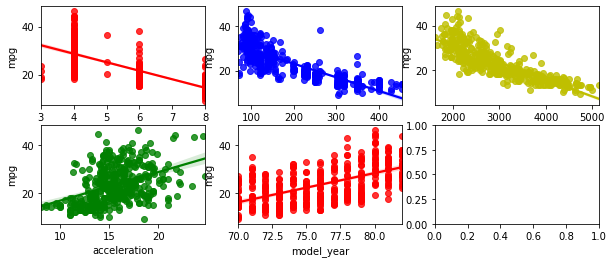

In [26]:
# 회귀 분석 결과도
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,4),ncols=3,nrows=2)
x_features = ['cylinders','displacement','weight','acceleration','model_year']
plot_color = ['r','b','y','g','r']
for i ,feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    
    print(row, col)
    sns.regplot(x=feature,y='mpg',data=data_df,
               ax=ax[row][col],color=plot_color[i])

In [17]:
# 예측한 답과 실제답을 비교해 봐야한다. 차이가 클수록 안 좋음
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# 실제값 : Y_test 예측값 : Y_predict 의 차이를 제곱으로 평균 (mean_squared_error)
mse = mean_squared_error(Y_test,Y_predict)
rmse = np.sqrt(mse)
#결정 계수 : (0 <= R2 <= 1) : 1에 가까울 수록 회귀식정확도가 높다로 해석
print('mse: ',mse,'  rmse: ',rmse)
print('R^2 결정계수 : ',r2_score(Y_test,Y_predict))

mse:  12.278239036609444   rmse:  3.5040318258556735
R^2 결정계수 :  0.8078579451877173


In [28]:
print('Y절편 값 : ', np.round(lr.intercept_,2)) 
print('회귀계수(기울기): ',np.round(lr.coef_,2))
# 소수점3 자리 수에서 반올림 해서 2째자리 수 까지

Y절편 값 :  -17.55
회귀계수(기울기):  [-0.14  0.01 -0.01  0.2   0.76]


In [20]:
coef = pd.Series(data=np.round(lr.coef_,2),index = X.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

In [29]:
print('연비를 예측하고 싶은 차의 정보를 입력해주세요.')
cylinders_1=int(input("cylinders: "))  #8
model_year_1=int(input("model_year : "))  #99
displacement_1=int(input("displacement : "))  #350
wight_1=int(input("wight : "))  #3200
acceleration_1=int(input("acceleration : "))  #22


연비를 예측하고 싶은 차의 정보를 입력해주세요
cylinders: 8
model_year : 99
displacement : 350
wight : 3200
acceleration : 22


In [32]:
mpg_predict = lr.predict([[cylinders_1,displacement_1,wight_1,acceleration_1,model_year_1]]) 
mpg_predict 

array([41.31991868])

1 0
1 1
1 2
1 3
1 4


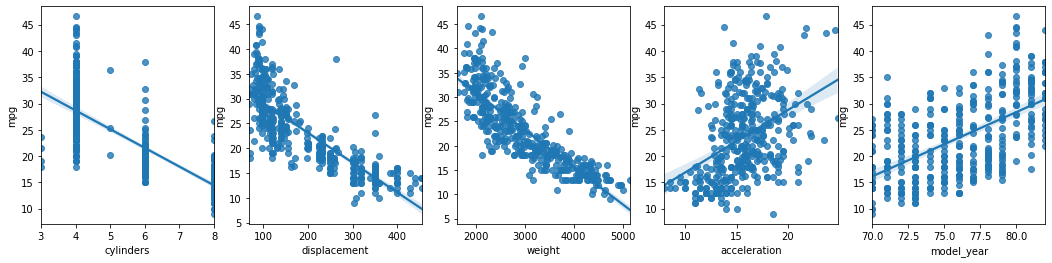

In [21]:
# 
import matplotlib.pyplot as plt
import seaborn as sns
x_features = ['cylinders','displacement','weight','acceleration','model_year']

fig, axs = plt.subplots(figsize=(18,4),ncols=5,nrows=1)

for i, feature in enumerate(x_features):
    col = i%5
    
    print(row, col)
    # reqplot : 산점도와 선형 회귀 그래프 함께 그려줌
    sns.regplot(x=feature, y='mpg',data=data_df,ax = axs[col])#[row]에 [col]번째